#  De beaux graphiques avec python: mise en pratique



<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=%C2%ABpython-datascientist%C2%BB&resources.requests.memory=%C2%AB4Gi%C2%BB)
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=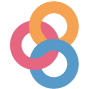)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=notebooks/course/visualisation/matplotlib.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/visualisation/matplotlib.ipynb)

La pratique de la visualisation se fera, dans ce cours, en répliquant des graphiques qu'on peut trouver sur
la page de l'*open-data* de la ville de Paris 
[ici](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name).

Ce TP vise à initier:

* Aux packages [matplotlib](https://matplotlib.org/) et
[seaborn](https://seaborn.pydata.org/) pour la construction de graphiques figés
* Au package [plotly](https://plotly.com/python/) pour les graphiques 
dynamiques, au format HTML

Nous verrons par la suite la manière de construire des cartes facilement avec
des formats équivalents.

Un sous-ensemble des données de [paris open data](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/information/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name) a été mis à disposition
sur {{< githubrepo >}} pour faciliter l'import (élimination des colonnes
qui ne nous servirons pas mais ralentissent l'import)


## Premier graphique avec l'API `matplotlib` de `pandas`

{{% panel status="exercise" title="Exercice 1: Importer les données et produire un premier graphique"
icon="fas fa-pencil-alt" %}}

1. Importer les données de compteurs de vélos. Vous pouvez utiliser l'url <https://github.com/linogaliana/python-datascientist/raw/master/data/bike.csv>. :warning: Il s'agit de données
compressées au format `gzip`, il faut donc utiliser l'option `compression`
2. En premier lieu, sans se préoccuper des éléments de style ni des labels des
graphiques, reproduire les deux premiers graphiques de la
[page d'analyse des données](https://opendata.paris.fr/explore/dataset/comptage-velo-donnees-compteurs/dataviz/?disjunctive.id_compteur&disjunctive.nom_compteur&disjunctive.id&disjunctive.name):
*Les 10 compteurs avec la moyenne horaire la plus élevée* et *Les 10 compteurs ayant comptabilisés le plus de vélos*.

Pour obtenir un graphique ordonné du plus grand au plus petit, il faut avoir les données ordonnées du plus petit au
plus grand. C'est bizarre mais c'est comme ça...











On peut remarquer plusieurs éléments problématiques (par exemple les labels) mais
aussi des éléments ne correspondant pas (les titres des axes, etc.) ou 
manquants (le nom du graphique...)

Comme les graphiques produits par `pandas` suivent la logique très flexible
de `matplotlib`, il est possible de les customiser. Cependant, c'est
souvent beaucoup de travail et il peut être préférable de directement
utiliser *seaborn*, qui offre quelques arguments prêts à l'emploi

## Utiliser directement `seaborn`

Vous pouvez repartir des deux dataframes précédents. On va suppose qu'ils se
nomment `df1` et `df2`. Réinitialiser l'index pour avoir une colonne 
*'Nom du compteur'*


{{% panel status="exercise" title="Exercice 2: un peu de style"
icon="fas fa-pencil-alt" %}}

Il y a plusieurs manières de faire un *bar* plot en `seaborn`. La plus flexible,
c'est-à-dire celle qui permet le mieux d'interagir avec `matplotlib` est
`catplot`

1. Refaire le graphique précédent avec la fonction adéquate de `seaborn`. Pour
contrôler la taille du graphique vous pouvez utiliser les arguments `height` et
`aspect`
2. Ajouter les titres des axes et le titre du graphique pour le premier graphique









Si vous désirez colorer en rouge l'axe des `x`, vous pouvez pré-définir un
style avec `sns.set_style("ticks", {"xtick.color": "red"})`




{{% panel status="exercise" title="Exercice 3: refaire les graphiques"
icon="fas fa-pencil-alt" %}}

Certaines opérations vont nécessiter un peu d'agilité dans la gestion des dates.
Avant cela, il faut créer une variable temporelle (vous pouvez la nommer
`datetime`) et la transformer en variable mensuelle (grâce à
`dt.to_period('M')`). Vous pouvez essayer de le faire vous même ou cliquer
ci-dessous pour la solution : 


In [ ]:
df['timestamp'] = pd.to_datetime(df['Date et heure de comptage'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce').dt.to_period('M')

1. Refaire le graphique *Les 10 compteurs ayant comptabilisés le plus de vélos *
2. Refaire le graphique *Moyenne mensuelle des comptages vélos *. Pour cela,
n'oubliez pas de créer la variable mensuelle. 
3. Refaire le graphique *Moyenne journalière des comptages vélos* (créer d'abord
une variable de jour avec `.dt.day`)
4. Refaire le graphique *Comptages vélo au cours des 7 derniers jours * (de l'échantillon)
















## Des graphiques dynamiques avec `Plotly`

Le package `Plotly` est une surcouche à la librairie Javascript 
`Plotly.js` qui permet de créer et manipuler des objets graphiques de manière
très flexible afin de produire des objets réactifs sans avoir à recourir
à Javascript.

Le point d'entrée recommandé est le module `Plotly Express`
([documentation ici](https://plotly.com/python/plotly-express/)) qui offre une arborescence
riche mais néanmoins intuitive pour construire des graphiques
(objets `plotly.graph_objects.Figure`) pouvant être modifiés *a posteriori*
si besoin (par exemple pour *customiser* les axes). 

### Comment visualiser un graphique `plotly` ?

Dans un notebook Jupyter classique, les lignes suivantes de code permettent
d'afficher le résultat d'une commande `Plotly` sous un bloc de code: 


In [ ]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

Pour `JupyterLab`, l'extension `jupyterlab-plotly` s'avère nécessaire:


In [ ]:
jupyter labextension install jupyterlab-plotly

Pour les utilisateurs de `python` via l'excellent package `R` `reticulate`, il
est possible d'écrire le résultats dans un fichier `.html` et d'utiliser
`htmltools::includeHTML` pour l'afficher via `R Markdown` (les utilisateurs
de `R` trouveront bien-sûr une technique bien plus simple: utiliser
directement le package `R` `plotly`...)

### Réplication de l'exemple précédent avec `plotly`

Les modules suivants seront nécessaires pour construire des graphiques
avec `plotly`:


In [ ]:
import plotly
import plotly.express as px

{{% panel status="exercise" title="Exercice 4: premier graphique avec plotly"
icon="fas fa-pencil-alt" %}}
L'objectif est de reconstuire le premier diagramme en barre avec `plotly`

1. Utiliser la fonction adéquate avec `Plotly Express`. Ne pas prendre le
thème par défaut mais un à fond blanc, pour avoir un résultat ressemblant
à celui proposé sur le site de l'*open-data*. Pour la couleur rouge,
vous pouvez utiliser l'argument `color_discrete_sequence`. 
2. Ne pas oublier de nommer les axes, et la couleur du texte de l'axe inférieur
3. Tester un autre thème, à fond sombre. Pour les couleurs, faire un 
groupe stockant les trois plus fortes valeurs puis les autres.



  
  


Le résultat devrait ressembler aux deux graphiques suivants:



# Exercices supplémentaires

https://plotly.com/python/v3/3d-network-graph/